# Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training.csv to training.csv


In [ ]:
 df= pd.read_csv("training.csv")

# Exploratory data analysis 

In [ ]:
df.shape

(1044, 50)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,GradeG1,GradeG2,FinalGrade_cat,Regularity_cat,school_cat,GradeG1_cat,GradeG2_cat,reason_cat,Mjob_cat,Fjob_cat,guardian_cat,famsize_cat,address_cat,sex_cat
0,GP,F,18,U,0,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,maths,Poor,Always regular,Failure,Poor,3,0,0,1,3,0,0,4,1,0,1,0
1,GP,F,17,U,0,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,maths,Poor,Always regular,Failure,Failure,3,0,0,1,1,0,0,2,0,0,1,0
2,GP,F,15,U,1,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,maths,Poor,Mostly regular,Poor,Poor,3,2,0,3,3,2,0,2,1,1,1,0
3,GP,F,15,U,0,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,maths,Good,Always regular,Good,Satisfactory,2,0,0,2,4,1,1,3,1,0,1,0
4,GP,F,16,U,0,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,maths,Poor,Always regular,Poor,Poor,3,0,0,3,3,1,2,2,0,0,1,0


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,GradeG1,GradeG2,FinalGrade_cat,Regularity_cat,school_cat,GradeG1_cat,GradeG2_cat,reason_cat,Mjob_cat,Fjob_cat,guardian_cat,famsize_cat,address_cat,sex_cat
0,GP,F,18,U,0,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,maths,Poor,Always regular,Failure,Poor,3,0,0,1,3,0,0,4,1,0,1,0
1,GP,F,17,U,0,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,maths,Poor,Always regular,Failure,Failure,3,0,0,1,1,0,0,2,0,0,1,0
2,GP,F,15,U,1,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,maths,Poor,Mostly regular,Poor,Poor,3,2,0,3,3,2,0,2,1,1,1,0
3,GP,F,15,U,0,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,maths,Good,Always regular,Good,Satisfactory,2,0,0,2,4,1,1,3,1,0,1,0
4,GP,F,16,U,0,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,maths,Poor,Always regular,Poor,Poor,3,0,0,3,3,1,2,2,0,0,1,0


View summary of dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          1044 non-null   object
 1   sex             1044 non-null   object
 2   age             1044 non-null   int64 
 3   address         1044 non-null   object
 4   famsize         1044 non-null   int64 
 5   Pstatus         1044 non-null   object
 6   Medu            1044 non-null   int64 
 7   Fedu            1044 non-null   int64 
 8   Mjob            1044 non-null   object
 9   Fjob            1044 non-null   object
 10  reason          1044 non-null   object
 11  guardian        1044 non-null   object
 12  traveltime      1044 non-null   int64 
 13  studytime       1044 non-null   int64 
 14  failures        1044 non-null   int64 
 15  schoolsup       1044 non-null   object
 16  famsup          1044 non-null   object
 17  paid            1044 non-null   object
 18  activiti

In [ ]:
#Medu,Fedu,studytime,famrel,G1,G2,reason,Mjob,Fjob,address,famsize,school

In [ ]:
df1=df.copy()
df1 = df1.drop(columns=["sex","age",	"Pstatus",	"guardian",	"traveltime",	"schoolsup",	"famsup",	"paid",	"activities",	"nursery",	"higher",	"internet",	"romantic",	"freetime",	"goout",	"Dalc",	"Walc",	"health",	"absences",	"subject"	,"Regularity","G3","FinalGrade_cat","Regularity_cat",	"school_cat",	"GradeG1_cat"	,"GradeG2_cat"	,"reason_cat"	,"Mjob_cat"	,"Fjob_cat"	,"guardian_cat"	,"famsize_cat"	,"address_cat", "sex_cat"],axis=1)
df1.head()

,school,address,famsize,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,famrel,G1,G2,FinalGrade,GradeG1,GradeG2
0,GP,U,0,4,4,at_home,teacher,course,2,0,4,5,6,Poor,Failure,Poor
1,GP,U,0,1,1,at_home,other,course,2,0,5,5,5,Poor,Failure,Failure
2,GP,U,1,1,1,at_home,other,other,2,3,4,7,8,Poor,Poor,Poor
3,GP,U,0,4,2,health,services,home,3,0,3,15,14,Good,Good,Satisfactory
4,GP,U,0,3,3,other,other,home,2,0,4,6,10,Poor,Poor,Poor


Frequency distribution of values in variables

In [ ]:
col_names = ["school",	"address",	"famsize",	"Medu",	"Fedu",	"Mjob",	"Fjob",	"reason",	"studytime",	"failures",		"famrel",	"G1",	"G2"	,"FinalGrade"	,	"GradeG1"	,"GradeG2"	]


for col in col_names:
    
    print(df1[col].value_counts())   

GP    772
MS    272
Name: school, dtype: int64
U    759
R    285
Name: address, dtype: int64
0    738
1    306
Name: famsize, dtype: int64
4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64
2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64
other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64
other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64
course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64
2    503
1    317
3    162
4     62
Name: studytime, dtype: int64
0    861
1    120
2     33
3     30
Name: failures, dtype: int64
4    512
5    286
3    169
2     47
1     30
Name: famrel, dtype: int64
10    146
11    130
12    117
13    105
14    101
9      96
8      83
7      70
15     59
16     44
6      33
17     24
18     15
5      12
19      4
4       3
3       1
0       1
Name: G1, dtype: int64
11    

Explore class variable

In [ ]:
df1['FinalGrade'].value_counts()

Satisfactory    457
Poor            320
Good            169
Failure          63
Excellent        35
Name: FinalGrade, dtype: int64

Missing values in variables

In [ ]:

df1.isnull().sum()

school        0
address       0
famsize       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
studytime     0
failures      0
famrel        0
G1            0
G2            0
FinalGrade    0
GradeG1       0
GradeG2       0
dtype: int64

# Declare feature vector and target variable

In [ ]:
X = df1.drop(['FinalGrade'], axis=1)

y = df1['FinalGrade']

# Split data into separate training and test set 

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((835, 15), (209, 15))

# Feature Engineering

In [ ]:
# check data types in X_train

X_train.dtypes

school       object
address      object
famsize       int64
Medu          int64
Fedu          int64
Mjob         object
Fjob         object
reason       object
studytime     int64
failures      int64
famrel        int64
G1            int64
G2            int64
GradeG1      object
GradeG2      object
dtype: object

Encode categorical variables

In [ ]:
X_train.head()

,school,address,famsize,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,famrel,G1,G2,GradeG1,GradeG2
89,GP,U,1,4,4,teacher,health,reputation,2,0,4,8,6,Poor,Poor
704,GP,U,0,4,2,health,other,reputation,2,0,5,10,12,Poor,Satisfactory
692,GP,R,0,2,2,other,services,other,1,0,5,9,10,Poor,Poor
30,GP,U,0,4,4,health,services,home,2,0,5,9,11,Poor,Satisfactory
317,GP,U,0,4,3,other,other,course,3,0,4,9,10,Poor,Poor


In [ ]:
y_train.head()

89             Poor
704    Satisfactory
692            Poor
30     Satisfactory
317            Poor
Name: FinalGrade, dtype: object

In [ ]:
X_train["Mjob"].unique()

array(['teacher', 'health', 'other', 'at_home', 'services'], dtype=object)

In [ ]:
X_test.head()

,school,address,famsize,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,famrel,G1,G2,GradeG1,GradeG2
975,MS,R,0,1,1,other,other,home,1,1,4,8,9,Poor,Poor
522,GP,U,0,0,1,at_home,other,course,2,2,3,9,10,Poor,Poor
413,GP,U,0,3,2,services,services,course,1,3,5,8,8,Poor,Poor
905,MS,R,0,2,2,other,other,reputation,2,0,5,15,17,Good,Good
328,GP,U,0,4,4,teacher,services,course,3,0,5,10,9,Poor,Poor


In [ ]:
!pip install category_encoders
import category_encoders as ce

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   address     1044 non-null   object
 2   famsize     1044 non-null   int64 
 3   Medu        1044 non-null   int64 
 4   Fedu        1044 non-null   int64 
 5   Mjob        1044 non-null   object
 6   Fjob        1044 non-null   object
 7   reason      1044 non-null   object
 8   studytime   1044 non-null   int64 
 9   failures    1044 non-null   int64 
 10  famrel      1044 non-null   int64 
 11  G1          1044 non-null   int64 
 12  G2          1044 non-null   int64 
 13  FinalGrade  1044 non-null   object
 14  GradeG1     1044 non-null   object
 15  GradeG2     1044 non-null   object
dtypes: int64(8), object(8)
memory usage: 130.6+ KB


In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols = ["school",	"address",	"famsize",	"Medu",	"Fedu",	"Mjob",	"Fjob",	"reason",	"studytime",	"failures",		"famrel",	"G1",	"G2"	,"GradeG1"	,"GradeG2"])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,school,address,famsize,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,famrel,G1,G2,GradeG1,GradeG2
89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
704,1,1,2,1,2,2,2,1,1,1,2,2,2,1,2
692,1,2,2,2,2,3,3,2,2,1,2,3,3,1,1
30,1,1,2,1,1,2,3,3,1,1,2,3,4,1,2
317,1,1,2,1,3,3,2,4,3,1,1,3,3,1,1


In [ ]:
X_test.head()

,school,address,famsize,Medu,Fedu,Mjob,Fjob,reason,studytime,failures,famrel,G1,G2,GradeG1,GradeG2
975,2,2,2,4,4,3,2,3,2,2,1,1.0,12.0,1,1
522,1,1,2,5,4,4,2,4,1,4,3,3.0,3.0,1,1
413,1,1,2,3,2,5,3,4,2,3,2,1.0,8.0,1,1
905,2,2,2,2,2,3,2,1,1,1,2,7.0,10.0,3,3
328,1,1,2,1,1,1,3,4,3,1,2,2.0,12.0,1,1


In [ ]:
y_train

89             Poor
704    Satisfactory
692            Poor
30     Satisfactory
317            Poor
           ...     
454            Good
966            Poor
944       Excellent
347            Poor
563            Poor
Name: FinalGrade, Length: 835, dtype: object

# Decision Tree Classifier with criterion gini index

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8517


In [ ]:
X_train.to_csv("X_train dataset")

Compare the train-set and test-set accuracy


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Poor', 'Satisfactory', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Satisfactory', 'Satisfactory', 'Poor', 'Poor', 'Poor', 'Good',
       'Poor', 'Poor', 'Good', 'Poor', 'Satisfactory', 'Satisfactory',
       'Good', 'Failure', 'Good', 'Good', 'Satisfactory', 'Satisfactory',
       'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor', 'Poor', 'Poor',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Poor', 'Good',
       'Satisfactory', 'Poor', 'Satisfactory', 'Good', 'Poor', 'Poor',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Poor',
       'Satisfactory', 'Satisfactory', 'Poor', 'Good', 'Poor',
       'Satisfactory', 'Poor', 'Good', 'Good', 'Satisfactory', 'Poor',
       'Poor', 'Satisfactory', 'Satisfactory', 'Satisfactory',
       'Satisfactory', 'Satisfactory', 'Good', 'Good', 'Satisfactory',
       'Poor', 'Poor', 'Poor', 'Satisfactory', 'Poor', 'Satisfactory',
       'Satisfactory', 'Excellent', 'Satisfactory', 'Satisfactory',
       'Poor', 'Poor', 'Satisf

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8359


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8359
Test set score: 0.8517


Visualize decision-trees

[Text(781.2, 489.24, 'X[14] <= 1.5\ngini = 0.682\nsamples = 835\nvalue = [28, 50, 131, 262, 364]'),
 Text(390.6, 380.52000000000004, 'X[12] <= 4.5\ngini = 0.407\nsamples = 313\nvalue = [0, 26, 1, 234, 52]'),
 Text(195.3, 271.8, 'X[13] <= 1.5\ngini = 0.519\nsamples = 121\nvalue = [0, 7, 1, 74, 39]'),
 Text(97.65, 163.08000000000004, 'X[7] <= 2.5\ngini = 0.48\nsamples = 90\nvalue = [0, 7, 1, 61, 21]'),
 Text(48.825, 54.360000000000014, 'gini = 0.291\nsamples = 30\nvalue = [0, 3, 0, 25, 2]'),
 Text(146.47500000000002, 54.360000000000014, 'gini = 0.535\nsamples = 60\nvalue = [0, 4, 1, 36, 19]'),
 Text(292.95000000000005, 163.08000000000004, 'X[11] <= 6.5\ngini = 0.487\nsamples = 31\nvalue = [0, 0, 0, 13, 18]'),
 Text(244.125, 54.360000000000014, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 7]'),
 Text(341.77500000000003, 54.360000000000014, 'gini = 0.497\nsamples = 24\nvalue = [0, 0, 0, 13, 11]'),
 Text(585.9000000000001, 271.8, 'X[7] <= 3.5\ngini = 0.291\nsamples = 192\nvalue = [0, 19, 

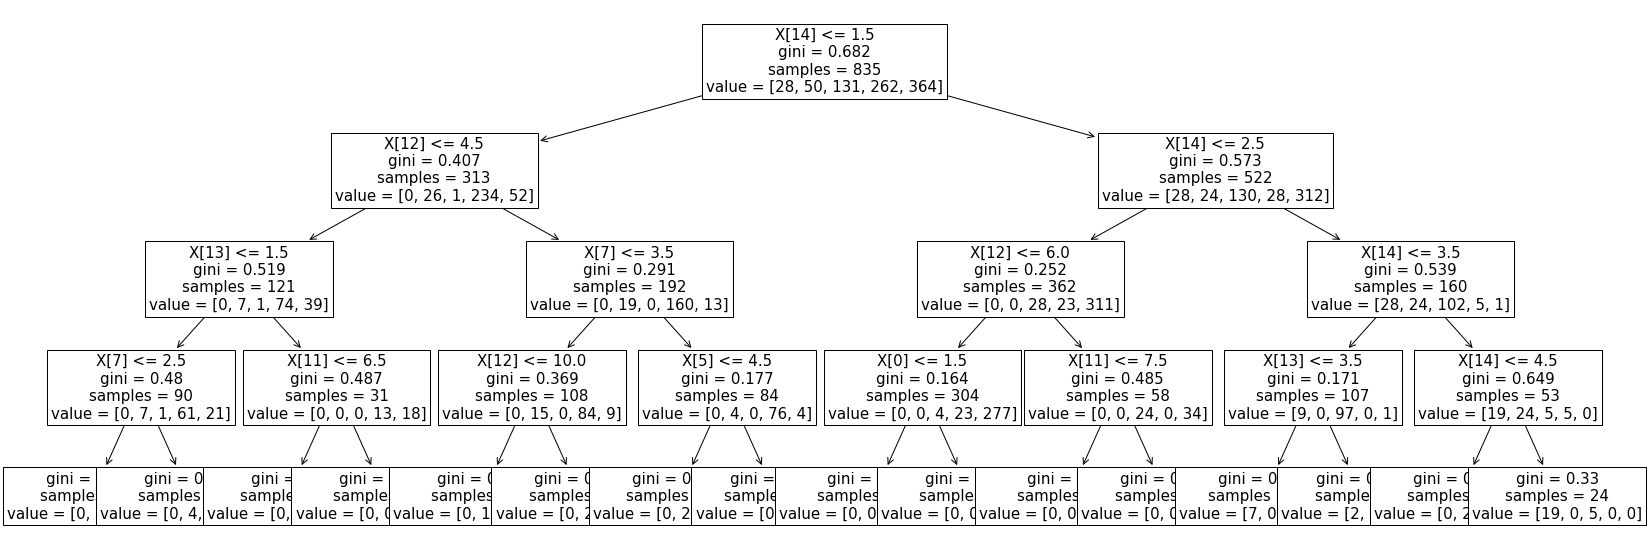

In [ ]:
plt.figure(figsize=(28,10))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),fontsize=15)

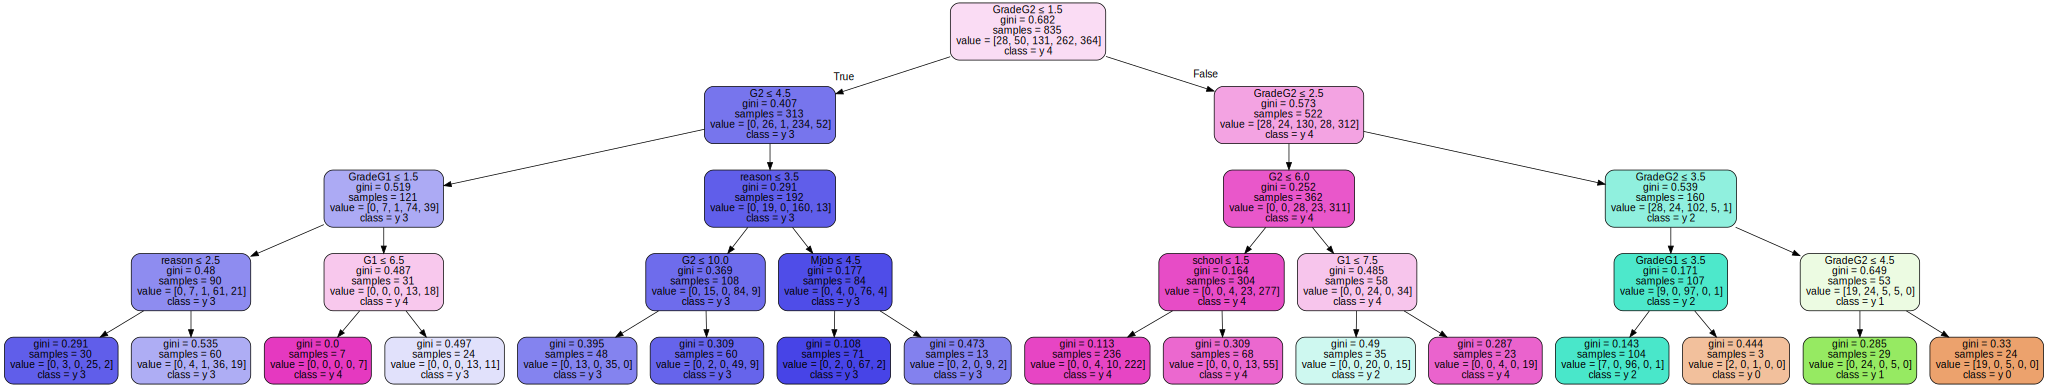

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=True,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

# Decision Tree Classifier with criterion entropy 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict the Test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8565


Compare the train-set and test-set accuracy

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Poor', 'Satisfactory', 'Poor', 'Satisfactory', 'Poor', 'Poor',
       'Satisfactory', 'Satisfactory', 'Poor', 'Poor', 'Poor', 'Good',
       'Poor', 'Poor', 'Good', 'Poor', 'Satisfactory', 'Satisfactory',
       'Good', 'Failure', 'Good', 'Good', 'Satisfactory', 'Satisfactory',
       'Poor', 'Poor', 'Satisfactory', 'Poor', 'Poor', 'Poor', 'Poor',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Poor', 'Good',
       'Satisfactory', 'Poor', 'Satisfactory', 'Good', 'Poor', 'Poor',
       'Satisfactory', 'Poor', 'Poor', 'Satisfactory', 'Poor',
       'Satisfactory', 'Satisfactory', 'Satisfactory', 'Good', 'Poor',
       'Satisfactory', 'Poor', 'Good', 'Good', 'Satisfactory', 'Poor',
       'Poor', 'Satisfactory', 'Satisfactory', 'Satisfactory',
       'Satisfactory', 'Satisfactory', 'Good', 'Good', 'Satisfactory',
       'Poor', 'Satisfactory', 'Poor', 'Satisfactory', 'Poor',
       'Satisfactory', 'Satisfactory', 'Excellent', 'Satisfactory',
       'Satisfactory', 'Poor',

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8371


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8371
Test set score: 0.8565


Visualize decision-trees

[Text(1060.2, 978.48, 'X[14] <= 1.5\nentropy = 1.874\nsamples = 835\nvalue = [28, 50, 131, 262, 364]'),
 Text(530.1, 761.0400000000001, 'X[12] <= 4.5\nentropy = 1.069\nsamples = 313\nvalue = [0, 26, 1, 234, 52]'),
 Text(265.05, 543.6, 'X[12] <= 2.0\nentropy = 1.255\nsamples = 121\nvalue = [0, 7, 1, 74, 39]'),
 Text(132.525, 326.1600000000001, 'X[9] <= 1.5\nentropy = 0.787\nsamples = 17\nvalue = [0, 4, 0, 13, 0]'),
 Text(66.2625, 108.72000000000003, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(198.78750000000002, 108.72000000000003, 'entropy = 0.918\nsamples = 6\nvalue = [0, 4, 0, 2, 0]'),
 Text(397.57500000000005, 326.1600000000001, 'X[13] <= 1.5\nentropy = 1.194\nsamples = 104\nvalue = [0, 3, 1, 61, 39]'),
 Text(331.3125, 108.72000000000003, 'entropy = 1.173\nsamples = 75\nvalue = [0, 3, 1, 50, 21]'),
 Text(463.83750000000003, 108.72000000000003, 'entropy = 0.958\nsamples = 29\nvalue = [0, 0, 0, 11, 18]'),
 Text(795.1500000000001, 543.6, 'X[12] <= 10.0\nentropy = 0.

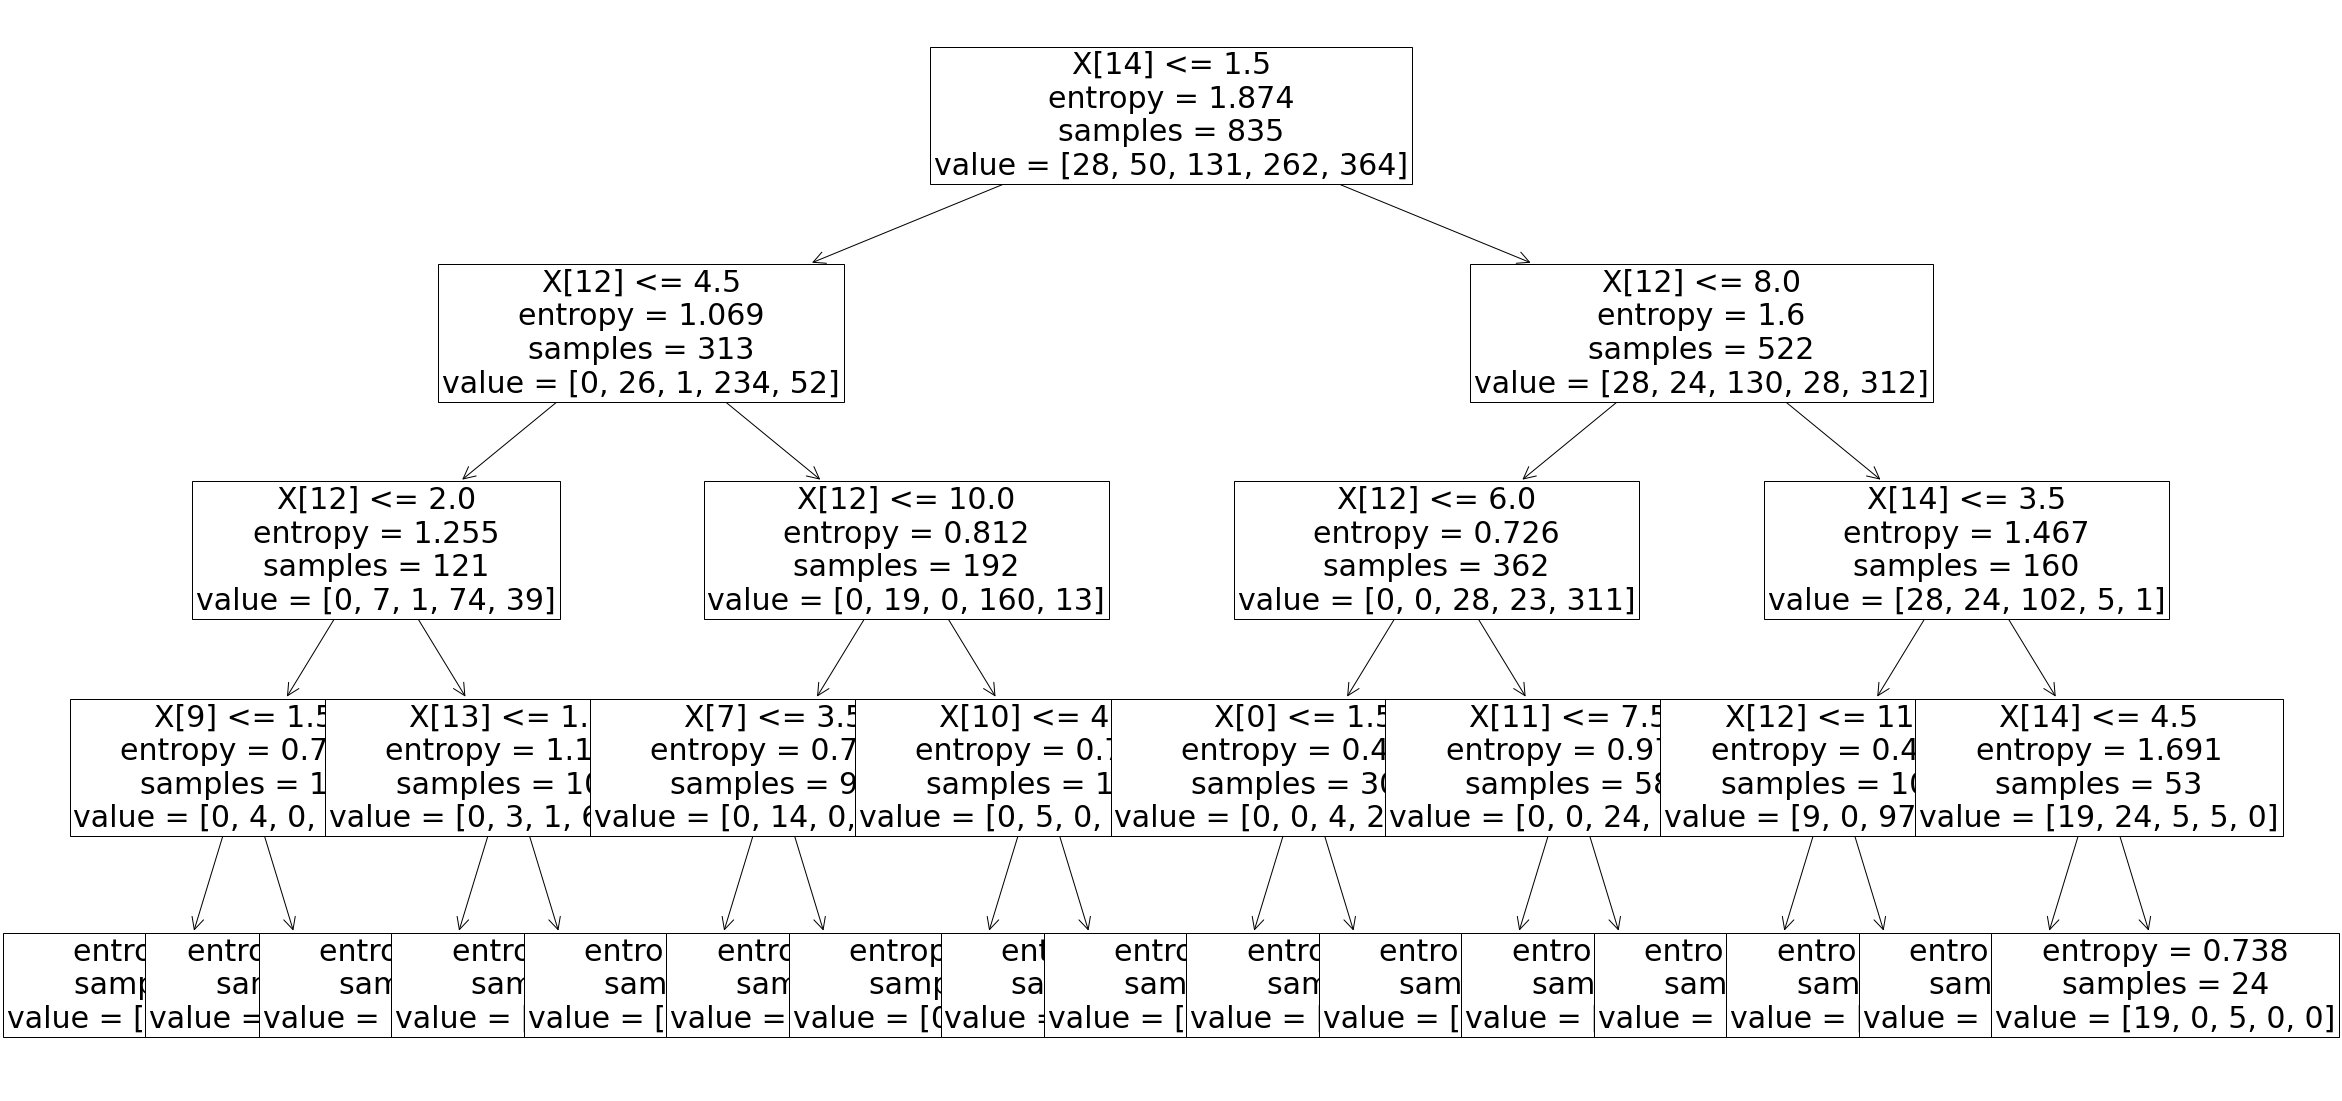

In [ ]:
plt.figure(figsize=(38,20))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),fontsize=30) 

In [ ]:
y.unique()

array(['Poor', 'Good', 'Satisfactory', 'Excellent', 'Failure'],
      dtype=object)

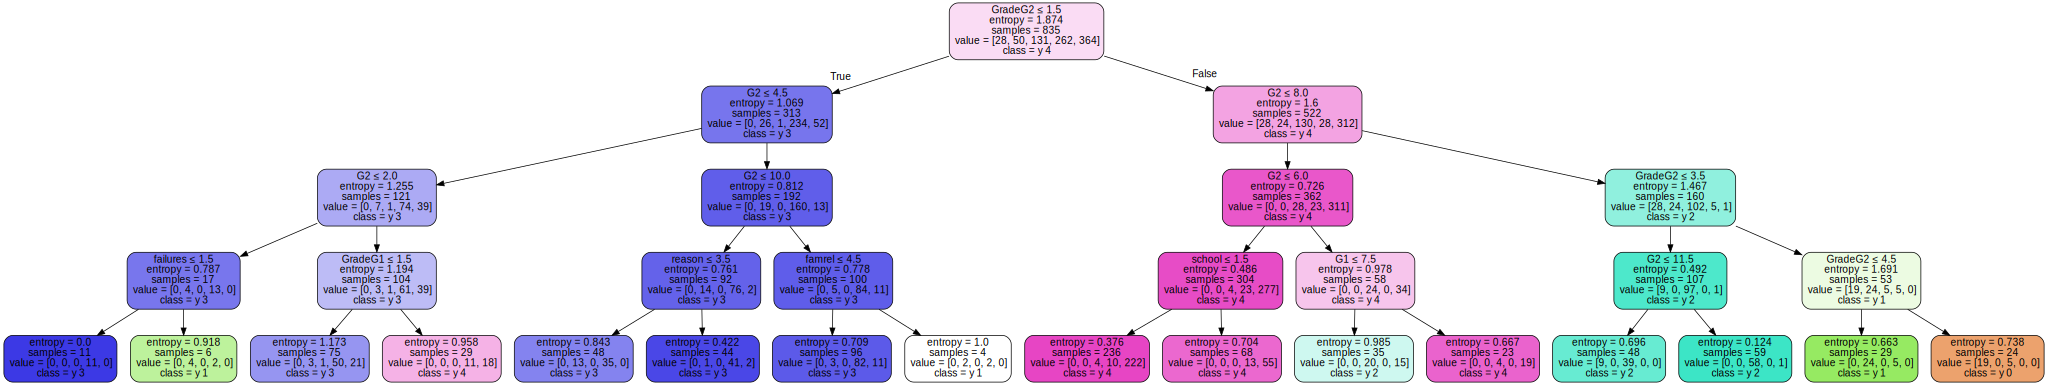

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=True,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

# Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 6  0  1  0  0]
 [ 0 10  0  2  1]
 [ 0  0 33  0  5]
 [ 0  3  0 49  6]
 [ 0  0  6  6 81]]


# Classification Report 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

   Excellent       1.00      0.86      0.92         7
     Failure       0.77      0.77      0.77        13
        Good       0.82      0.87      0.85        38
        Poor       0.86      0.84      0.85        58
Satisfactory       0.87      0.87      0.87        93

    accuracy                           0.86       209
   macro avg       0.86      0.84      0.85       209
weighted avg       0.86      0.86      0.86       209



# Accuracy of Decision Tree Model
with all 15 attributes

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8359
Test set score: 0.8517


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8371
Test set score: 0.8565


# make new predictions

In [ ]:
a=[]
b=["school",	"address",	"famsize",	"Medu",	"Fedu",	"Mjob",	"Fjob",	"reason",	"studytime",	"failures",		"famrel",	"G1",	"G2"	,"GradeG1"	,"GradeG2"]
for i in range(0,15):
  a.append(input("enter "+b[i]+":"))

enter school:GP
enter address:U


KeyboardInterrupt: ignored

In [ ]:
if a[0]=="GP":
  a[0]=1
else:
  a[0]=2
if a[1]=="U":
  a[1]=1
else:
  a[1]=2
if a[5]=="other":
  a[5]=3
elif a[5]=="services":
  a[5]=5
elif a[5]=='at_home':
  a[5]=4
elif a[5]=='teacher':
  a[5]=1
else:
  a[5]=2
if a[6]=="other":
  a[6]=2
elif a[6]=="services":
  a[6]=3
elif a[6]=='at_home':
  a[6]=5
elif a[6]=='teacher':
  a[6]=4
else:
  a[6]=1

if a[7]=='reputation':
  a[7]=1
elif a[7]== 'other':
  a[7]=2
elif a[7]== 'home':
  a[7]=3
else:
  a[7]=4
if a[13]=='Poor':
  a[13]=1
elif a[13]=='Satisfactory':
  a[13]=2
elif a[13]== 'Good':
  a[13]=3
elif a[13]== 'Excellent':
  a[13]=4
else:
  a[13]=5

if a[14]=='Poor':
  a[14]=1
elif a[14]=='Satisfactory':
  a[14]=2
elif a[14]== 'Good':
  a[14]=3
elif a[14]== 'Excellent':
  a[14]=5
else:
  a[14]=4

clf_en.predict([a])


#0,1,5,6,7,13,14
#0 : GP-1,MS-2
#1 : U=1, R=2
#5 : other =3,services =5 ,at_home=4, teacher =1, health =2
#6 : 'health'-1, 'other'-2, 'services'-3, 'teacher'-4, 'at_home'-5
#7 : 'reputation'-1, 'other'-2, 'home'-3, 'course'-4
#13:  'Poor'-1, 'Satisfactory'-2, 'Good'-3, 'Excellent'-4, 'Failure'-5
#14: 'Poor'-1, 'Satisfactory-2', 'Good'-3, 'Failure'-4, 'Excellent'-5



array(['Satisfactory'], dtype=object)